<font size=8>Intrusion Detection System Using Machine Learning</font>

<font size=5>Objectif du projet: construire un modèle de ML de classification pour un jeu de données représentant des activités réseau contenant des attaques. 

<font size=4>Data Understanding and Preprocessing</font>

In [60]:
import pandas as pd
import numpy as np
from data_generator import *
np.random.seed(3)
data = pd.read_csv("Dataset_project_RS.csv", index_col=0)
data_for_project = data_generator(data)
data_for_project




,protocol_type,service,src_bytes,dst_bytes,land,wrong_fragment,hot,logged_in,num_compromised,root_shell,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
64934,tcp,private,0,0,0,0,0,0,0,0,...,20,0.08,0.08,0.00,0.00,1.0,1.0,0.00,0.00,neptune
59872,icmp,urp_i,126,0,0,0,0,0,0,0,...,11,0.18,0.14,0.18,0.18,0.0,0.0,0.00,0.00,normal
64093,tcp,csnet_ns,0,0,0,0,0,0,0,0,...,8,0.03,0.07,0.00,0.00,0.0,0.0,1.00,1.00,neptune
66983,tcp,http,216,526,0,0,0,1,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,normal
72078,tcp,sql_net,0,0,0,0,0,0,0,0,...,7,0.03,0.07,0.00,0.00,1.0,1.0,0.00,0.00,neptune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101565,tcp,http,202,2488,0,0,0,1,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,normal
42366,tcp,sunrpc,0,0,0,0,0,0,0,0,...,10,0.04,0.07,0.00,0.00,0.0,0.0,1.00,1.00,neptune
62234,udp,private,215,0,0,0,0,0,0,0,...,65,0.89,0.03,0.89,0.00,0.0,0.0,0.00,0.00,nmap
59437,icmp,ecr_i,1032,0,0,0,0,0,0,0,...,229,0.90,0.01,0.90,0.00,0.0,0.0,0.02,0.00,smurf


In [61]:
from ydata_profiling import ProfileReport
from sklearn.metrics import confusion_matrix
df = data_for_project
df=df.drop_duplicates() #on retire les lignes dupliqués si il y en a
df.to_csv('exemple.csv', index=False)


Ci dessous la création d'un rapport au format HTML qui permettra une meilleure exploitation des caractéristiques de la data

In [62]:
profile = ProfileReport(df, title="Dataset_project_RS", \
explorative=True)
profile.to_file("Dataset_project_RS")

/opt/anaconda3/envs/AI4Cyber/lib/python3.9/site-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/opt/anaconda3/envs/AI4Cyber/lib/python3.9/site-packages/ydata_profiling/profile_report.py:384: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<font size=6>Analyse du jeu de données</font>

Après une analyse approfondie du jeu de données, les observations suivantes ont été faites :

-Il n'y a aucune donnée manquante.

-Certaines variables présentent une asymétrie (ou skewness).

-Le jeu de données contient des variables catégorielles.

-Le jeu de données se compose de 35 colonnes et d'environ 70 000 lignes.

<font size=6> Décisions prises </font>

Afin de préparer le jeu de données pour l'entraînement des modèles, plusieurs transformations ont été effectuées :

-Transformation des données asymétriques : Les variables identifiées comme asymétriques ont été transformées en utilisant la méthode Yeo-Johnson, suivie d'une normalisation via la fonction scaler.fit_transform. Cette transformation a été choisie car l'asymétrie peut nuire aux performances de certains algorithmes. La méthode Yeo-Johnson a été retenue pour sa capacité à traiter tout type d'asymétrie et à rendre les données plus proches d'une distribution normale (gaussienne), ce qui est favorable à de nombreux modèles.

-Encodage des variables catégorielles : Les variables catégorielles ont été converties en variables dummies à l'aide de la méthode One-Hot Encoding. Cette technique crée des variables binaires (0 ou 1) qui facilitent le traitement des données par les algorithmes d'apprentissage automatique, améliorant ainsi l'efficacité et la précision.

-Réduction de dimension : Bien qu'il soit recommandé d'utiliser des méthodes comme l'analyse en composantes principales (PCA) lorsque le jeu de données présente un grand nombre de dimensions, cela n'a pas été jugé nécessaire dans ce cas précis, étant donné que le jeu de données compte seulement 25 colonnesdesquelles on fera des one-hot. Donc je fais l'hypothèse que ce ne sera pas nécéssaire.


In [50]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import PowerTransformer



pt = PowerTransformer(method='yeo-johnson')


df['src_bytes'] = pt.fit_transform(df[['src_bytes']])  
df['dst_bytes'] = pt.fit_transform(df[['dst_bytes']])  
df['num_compromised'] = pt.fit_transform(df[['num_compromised']])  
df['num_root'] = pt.fit_transform(df[['num_root']])  
df['num_file_creations'] = pt.fit_transform(df[['num_file_creations']])  
df['num_access_files'] = pt.fit_transform(df[['num_access_files']])  


label_encoder = LabelEncoder()


y = df['outcome']
X = df.drop(columns=['outcome'])

df = df.drop(columns=['outcome'])

X = pd.get_dummies(X, drop_first=True)

y = label_encoder.fit_transform(y)

print(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

print(y_train)
print(y_test)
print(X_train_scaled)
print(X_test_scaled)




/var/folders/r1/bcdyxsgj545flbh7n_0yg3yh0000gn/T/ipykernel_49771/1506629065.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['src_bytes'] = pt.fit_transform(df[['src_bytes']])
/var/folders/r1/bcdyxsgj545flbh7n_0yg3yh0000gn/T/ipykernel_49771/1506629065.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dst_bytes'] = pt.fit_transform(df[['dst_bytes']])
/var/folders/r1/bcdyxsgj545flbh7n_0yg3yh0000gn/T/ipykernel_49771/1506629065.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy 

[ 9 11  9 ... 11 10 18]
[11 11  9 ... 18  9  9]
[11 11  0 ... 11  9  9]
[[ 0.75480463  0.87710464 -0.01590578 ... -0.07423168 -0.06720744
  -0.07959284]
 [ 0.87045879  1.33940618 -0.01590578 ... -0.07423168 -0.06720744
  -0.07959284]
 [-1.12062747 -0.90402323 -0.01590578 ... -0.07423168 -0.06720744
  -0.07959284]
 ...
 [ 1.2157619  -0.90402323 -0.01590578 ... -0.07423168 -0.06720744
  -0.07959284]
 [-1.12062747 -0.90402323 -0.01590578 ... -0.07423168 -0.06720744
  -0.07959284]
 [-1.12062747 -0.90402323 -0.01590578 ... -0.07423168 -0.06720744
  -0.07959284]]
[[ 0.28574101  0.71093225 -0.01590578 ... -0.07423168 -0.06720744
  -0.07959284]
 [ 0.63701721  1.34977743 -0.01590578 ... -0.07423168 -0.06720744
  -0.07959284]
 [ 2.19766257  1.45174145 -0.01590578 ... -0.07423168 -0.06720744
  -0.07959284]
 ...
 [ 0.64975065  0.65713063 -0.01590578 ... -0.07423168 -0.06720744
  -0.07959284]
 [-1.12062747 -0.90402323 -0.01590578 ... -0.07423168 -0.06720744
  -0.07959284]
 [-1.12062747 -0.90402323 

<font size=6>Choix des algorithmes</font>

<font size=3>
Dans le cadre de l'étude du dataset NSL-KDD, trois algorithmes d'apprentissage supervisé ont été utilisés : K-Nearest Neighbors (KNN), Multi-Layer Perceptron (MLP), et Decision Tree. Chacun de ces algorithmes a apporté des contributions spécifiques et intéressantes pour la classification des attaques et comportements normaux dans ce jeu de données.


K-Nearest Neighbors (KNN)

L'algorithme KNN repose sur un principe simple : classifier une instance en fonction de ses voisins les plus proches dans l'espace des caractéristiques. Cet algorithme a été particulièrement pertinent dans le cadre du NSL-KDD car il ne nécessite aucune hypothèse préalable sur la distribution des données, ce qui le rend adaptable à différents types de classes, notamment celles bien séparées. 

En revanche ce modèle possède plusieurs défauts. En effet d'un point de vue complexité, l'algorithme fais appel a des miliers de distances.Alors certes ce modèle est intéréssant mais ce n'est pas pour autant qu'il ne faut pas dire ses défauts.

Multi-Layer Perceptron (MLP)

Le MLP, un réseau de neurones artificiels à couches multiples, est conçu pour capturer des relations non linéaires complexes dans les données. Cela a été crucial pour le dataset NSL-KDD, qui comporte à la fois des variables continues et catégorielles avec des interactions parfois complexes entre elles. L'utilisation du MLP a permis d'obtenir des résultats très satisfaisants en termes de précision et de rappel, en particulier pour les classes d'attaques plus difficiles à distinguer. Le MLP est également capable de bien généraliser sur des données volumineuses, ce qui a renforcé sa pertinence pour ce projet.

A savoir que MLP et KNN ont aussi été choisis car ils ont démontré leur éfficacité précédemment sur ce même jeu de données lors d'un précédent Lab.

Decision Tree

Le Decision Tree est un modèle facilement interprétable, ce qui a été un avantage notable dans l'analyse des résultats. En effet, cet algorithme permet de visualiser les décisions sous forme de règles hiérarchiques, facilitant ainsi la compréhension des mécanismes de classification. Il a montré une bonne capacité à classifier efficacement les différentes catégories d'attaques tout en gérant de manière adéquate à la fois les données numériques et catégorielles présentes dans le NSL-KDD. Sa flexibilité et sa robustesse face aux données bruitées en ont fait un outil utile pour cette étude.
</font>

<font size=4>1) K-Nearest Neighbors (KNN)</font>

<font size=2>
remarque:
L'utilisation de l'encodage one-hot (dummies) est essentielle pour que l'algorithme K-Nearest Neighbors (KNN) puisse traiter efficacement les variables catégorielles. KNN repose sur la notion de distance entre les points de données pour effectuer des classifications, ce qui nécessite des valeurs numériques. Les variables catégorielles doivent donc être transformées en variables binaires via l'encodage one-hot. Chaque catégorie devient ainsi une nouvelle colonne binaire (0 ou 1), permettant à KNN de calculer correctement la distance entre les instances et d'inclure les informations des variables catégorielles dans le processus de classification.

Ici après avoir fait l'encodage et la normalisation des données, les données se prettent bien a l'utilisation de KNN. De plus, la portabilité des données est aussi un avantage pour KNN.
</font>

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)



KNeighborsClassifier()

In [52]:
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn,zero_division=1)





print(f"Accuracy of KNN: {accuracy_knn * 100:.2f}%")
print("\nConfusion Matrix for KNN:")
print(conf_matrix_knn)
print("\nClassification Report for KNN:")
print(class_report_knn)





Accuracy of KNN: 95.07%

Confusion Matrix for KNN:
[[ 123    0    0    0    0    0    0    0    0    0    2    0    0    0
     0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    1    0    2    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    1    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    2    0    0    0    0    0    0    3    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0  445    0    0    0    0   40   20    0    0    0
     0    0    0    0    2    0]
 [   0    0    0    0    0    0    0    0    0    0    1    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    1    0    0    0
     0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0    0    1    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    1    0    0    0 5737    0   36    0    3    0
    31    0    0    0    0    0]
 [  

<font size=3>Interprétation des résultats du rapport:

Le modèle KNN appliqué au jeu de données NSL-KDD a obtenu une précision globale de 95.07%, indiquant une bonne performance globale pour la classification des différentes classes. 

Cependant, une analyse plus fine des résultats révèle des disparités importantes entre les classes, notamment entre les classes bien représentées et celles sous-représentées.
Les classes sous-représentées (comme les classes 1, 2, 4, 12), les classes avec très peu d'instances, les performances sont faibles, avec des scores de précision et de rappel très bas, voire nuls ou inexistants. 

KNN a des difficultés à bien classer ces classes en raison de la rareté des exemples dans ces catégories. Cela montre que KNN est sensible au déséquilibre de classe, car les classes minoritaires sont souvent absorbées par les classes majoritaires. Il est aussi possible que certaines données de l'échantillon de test soient uniquement présent dans l'échantillon test et de ce fait le modele n'a pas pu s'entrainer à les prédire.

Que peut on faire à l'avenir? 

Cela souligne l'importance d'un échantillonnage équilibré ou d'un traitement supplémentaire pour gérer les classes sous-représentées, par exemple en utilisant des techniques de rééchantillonnage. 
</font>


<font size=4>2) Multi-Layer Perceptron (MLP)</font>

Pourquoi avoir choisin MLP.
Parce que j'aime cet algo! #déclarationdamour<3


MLP permet de faire un apprentissage profond en s'adaptant aux relations complexes. Le nombre de données étant conséquant est d'autant plus un avantage pour généraliser et éviter le sureajustement. 
L'autre raison est l'expérience. En effet dans des labs précédents sur le même jeu de donnés, cet algorithme c'est montré performant avec de bon scores au niveau de l'accuracy et du f1-score.

In [53]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA




'''

j'éssayais de réduire en dimension afin d'exploiter l'algorithme. 
Car je pensais qu'au dela de 99% on étatit forcément dans une situation d'overfiting. Mais ce n'est pas forcément le cas. 
J'ai compris cela après une longue discution avec le professeur. 
J'ai jugé pertinent de laisser cette partie en commentaire car elle témoigne de l'évolution de mon travail et de ma compréhension.


pca = PCA(n_components=0.95)   # Garde 95% de la variance  
X_train_pca = pca.fit_transform(X_train)                       
X_test_pca = pca.transform(X_test)                             
'''

X_train_pca = X_train
X_test_pca = X_test

mlp = MLPClassifier(hidden_layer_sizes=(25, 100), max_iter=400, random_state=42)
mlp.fit(X_train_pca, y_train)

y_pred_mlp = mlp.predict(X_test_pca)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
class_report_mlp = classification_report(y_test, y_pred_mlp,zero_division=1)

print(f"Accuracy of MLP: {accuracy_mlp * 100:.2f}%")
print("\nConfusion Matrix for MLP:")
print(conf_matrix_mlp)
print("\nClassification Report for MLP:")
print(class_report_mlp)


Accuracy of MLP: 99.18%

Confusion Matrix for MLP:
[[ 125    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    2    0    0    0    0    0    0    0    0    2    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    1]
 [   0    0    0    5    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0  504    0    0    0    0    0    2    0    1    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    1    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    1    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    1    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0 5803    0    3    0    2    0
     0    0    0    0    0    0]
 [  

Dans un premier temps ma conclusion était celle ci:

"Dans l'introduction, j'avais exprimé l'intention de ne pas recourir à la réduction dimensionnelle via PCA. Toutefois, lors des tests avec le modèle MLP, l'accuracy atteignait plus de 99 %, malgré de nombreux ajustements de paramètres, ce qui révélait un problème d'overfitting persistant. J'ai tenté plusieurs approches, comme l'ajout de plus de données, l'application d'une régularisation avec le paramètre alpha, ainsi que l'early stopping, mais sans succès. Face à cette impasse, j'ai dû finalement utiliser PCA pour réduire la dimension des données et corriger ce surajustement. Mon hypothèse initiale s'est donc révélée incorrecte."

Mais après avoir échanger avec le professeur ma conclusion est celle ci:

Le modèle de Perceptron Multicouche (MLP) affiche une accuracy de 99,18%. Cependant, les métriques de précision et de rappel varient significativement entre les classes. Par exemple, certaines classes obtiennent une précision de 1.00 mais un rappel de 0.00, indiquant une mauvaise détection malgré une prédiction parfaite. D'autres, comme la classe 11, montrent de meilleures performances avec une précision de 1.00 et un rappel de 1.00. Il est aussi plosible que dans le jeu de test, il y ait des éléments non présents dans le jeu d'entrainement.

De plus j'ai essayé cet algorithme avec le jeu complet sans graine et les résultats sont toujours aussi élevés >99%.

Les valeurs de précision (0.86), de rappel (0.72) et de F1 (0.70) montrent que le modèle a globalement de bonnes performances, mais qu’il pourrait être amélioré pour les classes à faible support.

Ces résultats suggèrent la nécessité de stratégies pour améliorer le modèle, notamment des techniques d'équilibrage des classes et l'optimisation des hyperparamètres pour réduire l'overfitting (si il y a) et améliorer les performances sur les classes sous-représentées. 

<font size=4>3) Decision Tree</font>

Pourquoi Decision Tree?

Les decision tree sont utiles pour générer des règles explicables. Ils fonctionnent bien avec des données mixtes et sont moins sensibles au bruit, mais peuvent surajuster, nécessitant une régularisation (comme la taille maximale de l'arbre).
Dans le cas de cette étude j'ai fixé la profondeur maximale a 10 pour pouvoir nous permettre par la suite de pouvoir aussi visualiser l'arbre. Dans l'étude des hyperparametres on fera varier cette valeur afin de voir si on ne trouve pas mieux.

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


clf = DecisionTreeClassifier(max_depth= 10, random_state=42)
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred,zero_division=1)


print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(report)

clf = tree.DecisionTreeClassifier(max_depth= 5, random_state=42);
clf = clf.fit(X_test, y_pred)
plt.figure(figsize=(150,100))
tree.plot_tree(clf,fontsize=30);




Accuracy: 98.73%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       1.00      0.00      0.00         4
           2       1.00      0.00      0.00         1
           3       1.00      0.60      0.75         5
           5       1.00      0.89      0.94       507
           6       0.33      1.00      0.50         1
           7       0.00      0.00      0.00         1
           8       1.00      0.00      0.00         2
           9       1.00      1.00      1.00      5808
          10       0.98      0.90      0.94       213
          11       0.99      0.99      0.99      9364
          14       1.00      0.67      0.80        36
          15       0.99      0.93      0.96       306
          16       1.00      0.00      0.00         1
          17       0.97      0.96      0.96       526
          18       1.00      0.98      0.99       364
          19       1.00      0.00      0.

Le DecisionTreeClassifier a atteint une précision de 98,73% sur les données de test. Cependant, on constate des performances inégales :

Les classes bien fournies (0, 5, 9, 10, 11, 15, 17, 18, et 20) affichent des scores quasi-parfaits. Ici, le modèle cartonne, notamment pour les classes 9 et 11, où on a des milliers d'exemples. Pour les classes moins représentées (comme 1, 2, 6, 8, 16, 19), c’est moins convaincant. Faible support signifie souvent faible rappel et score F1 quasi nul.

La moyenne macro montre bien la faiblesse globale sur les petites classes (précision : 0,90 ; rappel : 0,63 ; F1 : 0,62).

Que peut on faire à l'avenir?

Cela souligne l'importance d'un échantillonnage équilibré ou d'un traitement supplémentaire pour gérer les classes sous-représentées, par exemple en utilisant des techniques de rééchantillonnage.

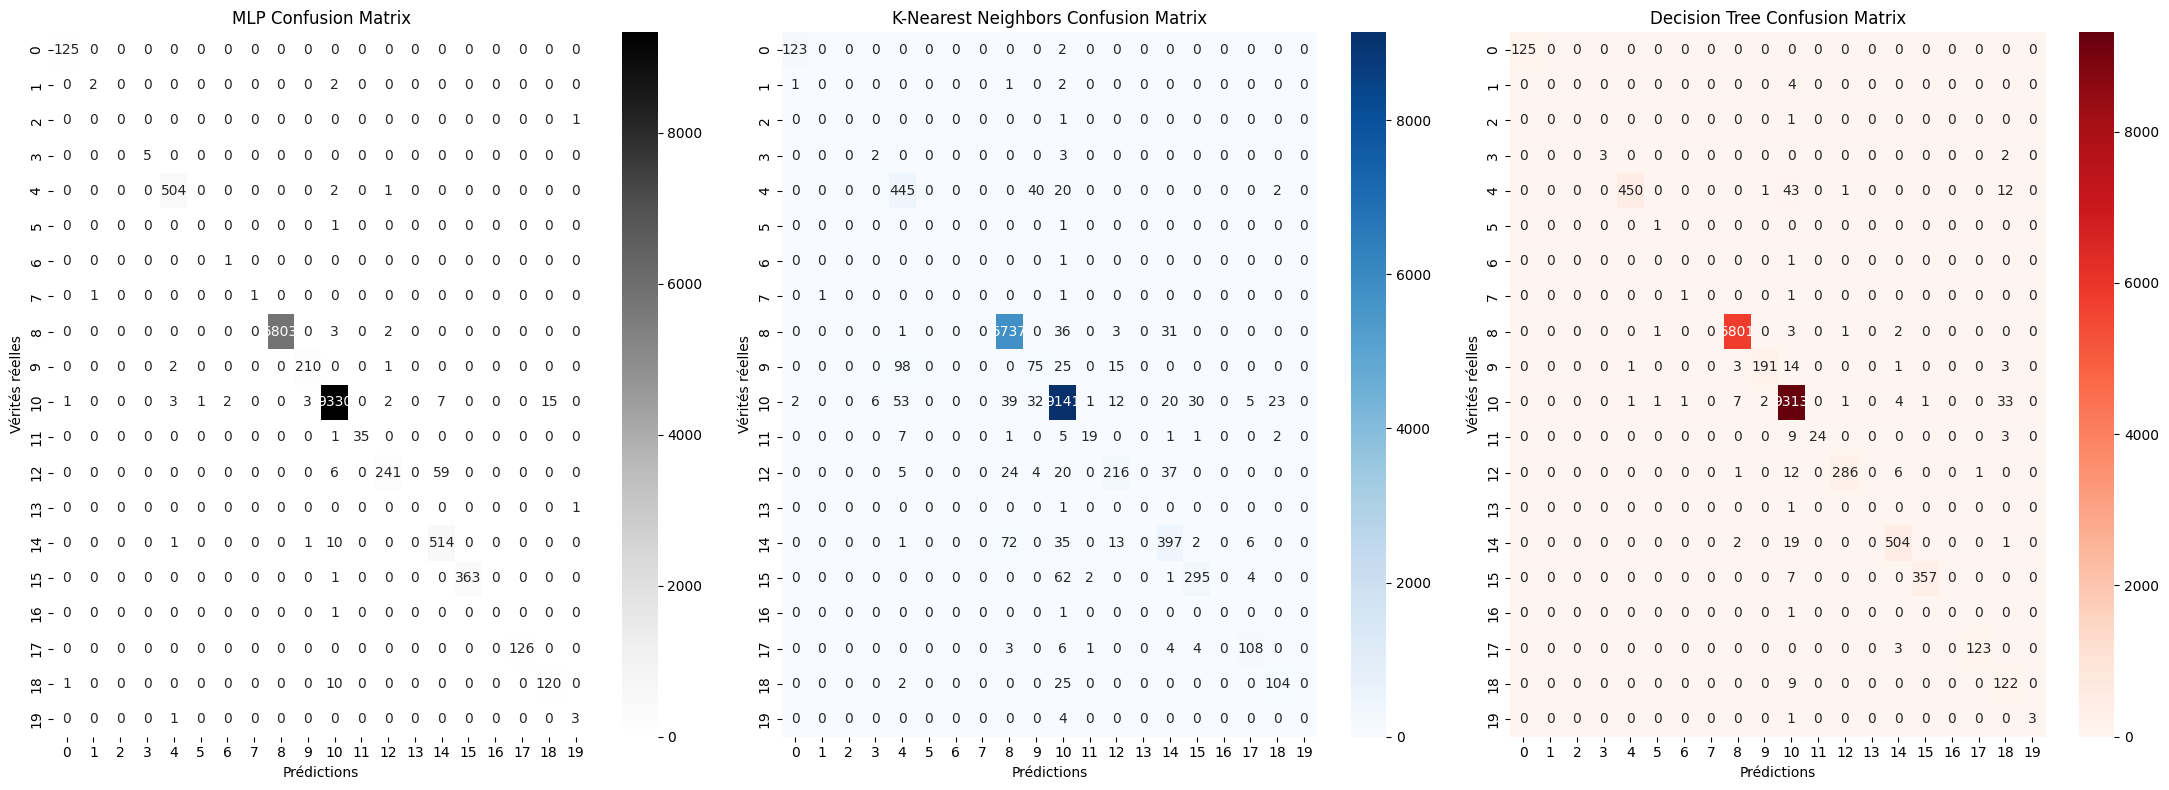

In [55]:


import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
conf_matrix_dt = confusion_matrix(y_test, y_pred)  


plt.figure(figsize=(22, 8))


plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Greys')
plt.title('MLP Confusion Matrix')
plt.xlabel('Prédictions')
plt.ylabel('Vérités réelles')


plt.subplot(1, 3, 2)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.xlabel('Prédictions')
plt.ylabel('Vérités réelles')


plt.subplot(1, 3, 3)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Reds')  # Vous pouvez changer la palette de couleurs ici
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Prédictions')
plt.ylabel('Vérités réelles')


plt.tight_layout()
plt.show()


<font size=6>Comparaison des performances entre KNN, MLP (avec PCA et Sans)  et l'Arbre de Décision</font>

<font size=3>1. Modèle KNN :

Accuracy : 95,07%

Le KNN montre une très bonne précision globale, avec des résultats élevés pour les classes majoritaires comme la classe 9 (0.99) et la classe 11 (0.98). Cependant, on observe des faiblesses pour certaines classes minoritaires (classes 1, 2, 4, 7, etc.) avec des scores de rappel nuls.
Macro avg : Le rappel global de 0.50 montre que certaines classes sont sous-détectées, bien que la précision soit meilleure à 0.84.

<font size=3>2. Modèle MLP avec PCA :

Accuracy : 97%

L'utilisation de PCA a permis de diminuer le surajustement, mais ce modèle souffre encore de performances inégales. Certaines classes montrent des scores de précision parfaits (1.00) mais des rappels de 0.00, comme les classes 1, 2 et 7. La classe majoritaire (classe 11) conserve de bonnes performances avec une précision de 0.93 et un rappel de 0.95, mais d'autres classes, comme la classe 5, ont des scores plus modestes (0.76 de précision et 0.54 de rappel).
Macro avg : Les résultats globaux sont faibles avec un rappel à 0.31, indiquant des difficultés à généraliser sur toutes les classes.

<font size=3>2. Modèle MLP sans PCA :

Accuracy : 99,18%

Le modèle fait un excellent travail sur la plupart des classes, mais il montre ses limites quand il s'agit de prédire les classes avec peu d'exemples. Ce sont ces classes, avec peu d'occurrences dans les données, qui tirent les scores de rappel et de F1 vers le bas. Pour pallier ce déséquilibre, on pourrait envisager de rééquilibrer le jeu de données ou d'ajuster le modèle avec des pondérations spécifiques pour les classes sous-représentées.

<font size=3>3. Arbre de Décision :

Accuracy : 99,06%
Encore une fois, le modèle est performant, surtout pour les classes bien représentées, ce qui se voit dans son excellent score général. Mais dès qu’on tombe sur les classes rares, il perd un peu pied, avec des rappels et F1 plus bas. Pour combler ces lacunes, on pourrait rééquilibrer le jeu de données ou adapter le modèle avec des pondérations pour ces classes spécifiques.

<font size=6>Conclusion 

Les trois algorithmes testés montrent des résultats satisfaisants, mais on observe une différence de performance, notamment en précision (accuracy), entre KNN, MLP et l’arbre de décision (Decision Tree). Cependant, il est crucial de ne pas se limiter uniquement à l'accuracy pour évaluer les modèles. 

En effet, il en ressort que les trois algorithmes ont du mal à traiter les classes sous-représentées, ce qui impacte leur capacité à classifier correctement les catégories peu fréquentes. Afin d’améliorer la clarté des résultats et de rendre les performances plus équilibrées, un rééchantillonnage des données pourrait s’avérer utile.

Le meilleur reste cependant MLP car il maximise les scores de précision, de rappel, et de F1 de manière équilibrée sur l'ensemble des classes, malgres un possible biais vis à vis des classes très représentés.


</font>

<font size=6>Hyperparameters</font>

Dans cette étude, on limite l’optimisation des hyperparamètres à un seul paramètre par algorithme : pour KNN, on ajuste seulement le nombre de voisins n ; pour le MLP, on se concentre sur l'architecture des couches ; et pour le Decision Tree, on regarde uniquement la profondeur de l'arbre.

Pourquoi ?
J’ai testé d’autres paramètres comme les poids et les distances pour KNN, mais le programme n’aboutissait pas. Cela est probablement dû à une complexité accrue, car chaque ajustement nécessite le calcul de distances des milliers de fois, ce qui alourdit énormément les traitements.

J’ai donc choisi de me concentrer sur un seul paramètre essentiel par algorithme pour simplifier et accélérer les tests.

In [56]:

from sklearn.model_selection import GridSearchCV
from sklearn import neighbors, metrics


param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15,50,100,10000]}


score = 'accuracy'

# Créer un classifieur kNN 
clf = GridSearchCV(
    neighbors.KNeighborsClassifier(), 
    param_grid,                        
    cv=5,                              
    scoring=score                      
)


clf.fit(X_train, y_train)

print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_params_)




print("\nRésultats de la validation croisée :")
print("{:<15} {:<15} {:<15}".format("n_neighbors", "Mean Accuracy", "Confidence Interval (95%)"))
print("="*45)

for mean, std, params in zip(
        clf.cv_results_['mean_test_score'],  
        clf.cv_results_['std_test_score'],   
        clf.cv_results_['params']           
    ):
    print("{:<15} {:.3f} {:<15}".format(
        params['n_neighbors'],
        mean,
        f"(± {std * 2:.3f})"  # Intervalle de confiance à 95%
    ))



 

/opt/anaconda3/envs/AI4Cyber/lib/python3.9/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 3}

Résultats de la validation croisée :
n_neighbors     Mean Accuracy   Confidence Interval (95%)
3               0.956 (± 0.004)      
5               0.950 (± 0.005)      
7               0.946 (± 0.003)      
9               0.942 (± 0.003)      
11              0.940 (± 0.004)      
13              0.938 (± 0.004)      
15              0.936 (± 0.003)      
50              0.917 (± 0.004)      
100             0.911 (± 0.004)      
10000           0.809 (± 0.006)      


<font size = 3>On constate que la meilleure valeur de n est 3 avec une Accuracy a 0.97.
On constate aussi que plus la valeur de n augmente, plus sa précision diminue. Il faut donc favoriser les petites valeurs de n dans cette étude.

In [59]:

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(random_state=42)


param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)]
}


grid_search_mlp = GridSearchCV(mlp, param_grid_mlp, cv=3, verbose=2, n_jobs=-1)
grid_search_mlp.fit(X_train, y_train)


print("Meilleurs paramètres pour MLP: ", grid_search_mlp.best_params_)
print("Meilleure précision pour MLP: ", grid_search_mlp.best_score_)



Fitting 3 folds for each of 3 candidates, totalling 9 fits


/opt/anaconda3/envs/AI4Cyber/lib/python3.9/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Meilleurs paramètres pour MLP:  {'hidden_layer_sizes': (100, 50)}
Meilleure précision pour MLP:  0.9938453756007082
[CV] END .......................................max_depth=10; total time=   0.3s
[CV] END .......................................max_depth=30; total time=   0.3s
[CV] END ..........................hidden_layer_sizes=(100,); total time=  29.7s
[CV] END .......................................max_depth=30; total time=   0.4s
[CV] END ..........................hidden_layer_sizes=(100,); total time=  29.9s
[CV] END .......................................max_depth=20; total time=   0.4s
[CV] END .....................................max_depth=None; total time=   0.3s
[CV] END ...........................hidden_layer_sizes=(50,); total time=  32.0s
[CV] END .......................................max_depth=20; total time=   0.4s
[CV] END ...........................hidden_layer_sizes=(50,); total time=  19.5s
[CV] END .......................hidden_layer_sizes=(100, 50); total time= 

On voit en plus le temps que ça a pris pour calculer à chaque fois.

In [58]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


dt = DecisionTreeClassifier(random_state=42)



param_grid_dt = {
    'max_depth': [10, 20, 30, None]
    
}

# Appliquer Grid Search pour Decision Tree
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=3, verbose=2, n_jobs=-1)
grid_search_dt.fit(X_train, y_train)


print("Meilleurs paramètres pour Decision Tree: ", grid_search_dt.best_params_)
print("Meilleure précision pour Decision Tree: ", grid_search_dt.best_score_)


Fitting 3 folds for each of 4 candidates, totalling 12 fits


/opt/anaconda3/envs/AI4Cyber/lib/python3.9/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Meilleurs paramètres pour Decision Tree:  {'max_depth': 20}
Meilleure précision pour Decision Tree:  0.9932552061377624


<font size=6> Conclusion </font>

L'analyse des hyperparamètres a permis d'identifier les configurations optimales pour chaque modèle de machine learning, améliorant ainsi leur performance sur le jeu de données.
Pour KNN, le meilleur paramètre est n_neighbors = 3, affichant une précision moyenne de 95,6% lors de la validation croisée, ce qui démontre une bonne capacité à capturer la structure des données.
Pour le Decision Tree, le paramètre optimal est max_depth = 20, atteignant une précision de 99,33%, indiquant une complexité adéquate pour modéliser les relations sans surajuster.
Enfin, le MLP avec deux couches cachées de 100 et 50 neurones obtient une précision de 99,38%, soulignant sa capacité à apprendre des motifs complexes.

En somme, bien que tous les modèles présentent des performances remarquables, le MLP se distingue par sa précision supérieure.
La concentration sur un seul hyperparamètre par modèle a permis une optimisation simplifiée et efficace.
